# My Linear Regression

## Introduction
Linear hypothesis function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def h(x, theta):
    num_row = np.size(x, 0)
    x = np.hstack((np.ones((num_row, 1)), x))
    return np.dot(x, theta)

Mean Squared Error function between the predicted values and the labels

In [2]:
def mean_squared_error(y_predicted, y_label):
    return ((y_predicted - y_label)**2).mean()

## Closed-form Solution
Class LeastSquareRegression to calculate the θ feature weights and make predictions

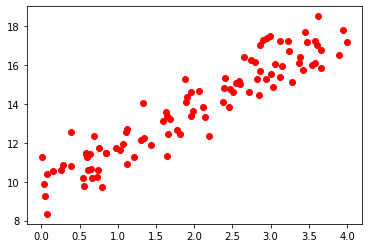

In [3]:
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None  
        
    def fit(self, X, y):
        #X = np.hstack((X, np.ones((100, 1))))
        a = np.dot(np.transpose(X),X)
        b = np.dot(np.linalg.inv(a), np.transpose(X))
        self.theta_ = np.dot(b, y)
        
    def predict(self, X):
        return np.dot(X_new, model.theta_)
        # Make predictions for data X, i.e output y = h(X) (See equation in Introduction)
        

X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

import matplotlib.pyplot as plt
plt.plot(X, y, 'ro')
plt.show()

Function which adds one to each instance

In [4]:
def bias_column(X):
    num_row = np.size(X, 0)
    return np.hstack((np.ones((num_row, 1)), X))
    

X_new = bias_column(X)

print(X[:5])
print(" ---- ")
print(X_new[:5])

[[3.65983347]
 [0.54192312]
 [3.60399389]
 [0.79327283]
 [1.59262343]]
 ---- 
[[1.         3.65983347]
 [1.         0.54192312]
 [1.         3.60399389]
 [1.         0.79327283]
 [1.         1.59262343]]


Calculation of the weights with the LeastSquaresRegression class

In [5]:
model = LeastSquaresRegression()
model.fit(X_new, y)

print(model.theta_)

[[9.79043343]
 [2.00637845]]


Predict of values from X and plot the two set of points superimposed by using the model

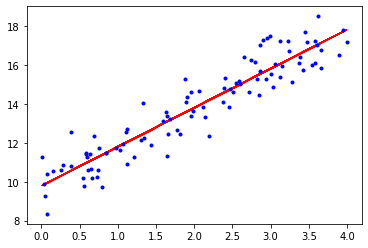

In [6]:
y_new = model.predict(X_new)

def my_plot(X, y, y_new):
    plt.plot(X, y_new, 'r')
    plt.plot(X, y, 'b.')
    plt.show()

my_plot(X, y, y_new)

## Gradient Descent

Gradient Descent Optimizer

This optimizer was used for a simple function: f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T). The input of f is a vector of size 2.

In [7]:
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = [start]
    
    def step(self):
        new_value = self.current_ - (self.learning_rate_ * fprime(self.current_))
        self.current_ = new_value
        self.history_.append(self.current_)
        return
        # Take a gradient descent step
        # 1. Compute the new value and update selt.current_
        # 2. Append the new value to history
        # Does not return anything

        
    def optimize(self, iterations = 100):
        for i in range(iterations):
            self.step()
        return
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step

            
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))
        

def f(x):
    f = 3 + np.dot(np.transpose(x - np.array([2, 6])), (x - np.array([2, 6])))
    return f
    

def fprime(x):
    fprime = 2*x - np.array([4, 12])
    return fprime
    
        
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()
print(grad.history_)

Best theta found is [1.71115034 5.33708303]
Value of f at this theta: f(theta) = 3.522893041867629
Value of f prime at this theta: f'(theta) = [-0.57769932 -1.32583395]
[array([-0.6901221 , -0.17389544]), array([-0.15209768,  1.06088365]), array([0.27832186, 2.04870692]), array([0.62265748, 2.83896554]), array([0.89812599, 3.47117243]), array([1.11850079, 3.97693794]), array([1.29480063, 4.38155036]), array([1.43584051, 4.70524028]), array([1.5486724 , 4.96419223]), array([1.63893792, 5.17135378]), array([1.71115034, 5.33708303])]


The function plot in 3D

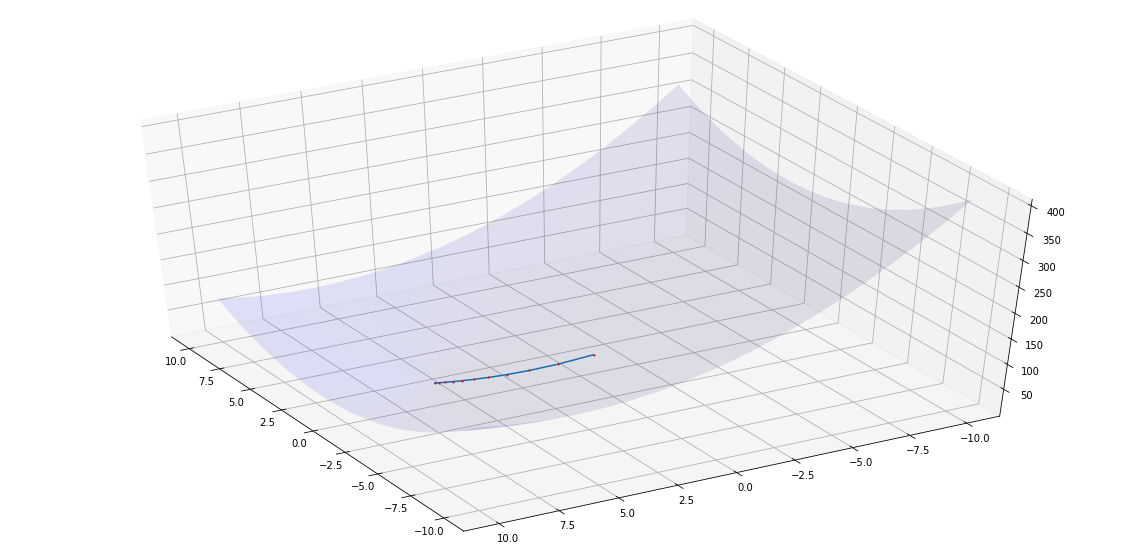

In [8]:
# importing modules 
from mpl_toolkits import mplot3d 
from matplotlib import pyplot 
  
# assigning coordinates     
a = np.linspace(-10, 10, 20) 
b = np.linspace(-10, 10, 20) 
x_axis, y_axis = np.meshgrid(a, b) 

z = 3 + (x_axis-2)**2 + (y_axis-6)**2
  
# creating the visualiztion 
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_axis, y_axis, z, rstride=1, cstride=1, color='b', alpha=0.1)

ax.plot([t[0] for t in grad.history_], [t[1] for t in grad.history_], [f(t) for t in grad.history_] , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.view_init(45, 150)

## Gradient Descent for Linear Regression


In [9]:
theta_start = np.random.randn(2,1)
def gradient_descent(X, m, y, theta_start, iterations = 100, learning_rate = 0.1):
    for i in range(iterations):
        a = np.dot(X, theta_start)
        b = np.subtract(a, y)
        grad = 2/m * np.dot(np.transpose(X), b)
        theta_start = theta_start - learning_rate*grad
    return theta_start

theta = gradient_descent(X_new, 100, y, theta_start)
print(theta)

[[9.68595894]
 [2.04755803]]


[[8.77574474]
 [2.40632739]]


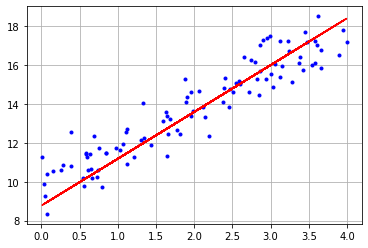

In [10]:
theta = gradient_descent(X_new, 20, y, theta_start, learning_rate = 0.01)
print(theta)
y_predicted = h(X, theta)

plt.plot(X, y, "b.")
plt.plot(X, y_predicted, "r-")
plt.grid()

[[-2.71772690e+70]
 [-6.89499704e+70]]


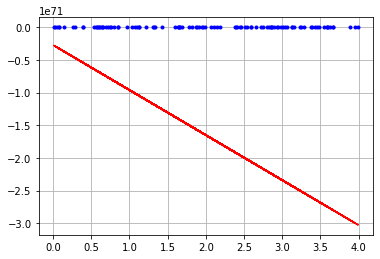

In [11]:
theta = gradient_descent(X_new, 20, y, theta_start, learning_rate = 0.1)
print(theta)
y_predicted = h(X, theta)

plt.plot(X, y, "b.")
plt.plot(X, y_predicted, "r-")
plt.grid()

[[-6.14071505e+161]
 [-1.55792741e+162]]


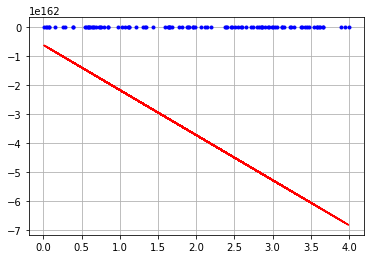

In [12]:
theta = gradient_descent(X_new, 20, y, theta_start, learning_rate = 0.7)
print(theta)
y_predicted = h(X, theta)

plt.plot(X, y, "b.")
plt.plot(X, y_predicted, "r-")
plt.grid()